In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, export_text

In [3]:
df= pd.read_csv('df_encoded.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0.0
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3.0
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3.0
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,2.0
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   quit                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary                  14999 non-null  int64  
 9   department_IT           14999 non-null  bool   
 10  department_RandD        14999 non-null  bool   
 11  department_accounting   14999 non-null  bool   
 12  department_hr           14999 non-null  bool   
 13  department_management   14999 non-null  bool   
 14  department_marketing    14999 non-null

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,hours_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14840.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706,1.473383
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,1.174724
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,3.000000


In [7]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
quit,0
promotion_last_5years,0
salary,0
department_IT,0


In [8]:
df.dropna(inplace=True)
df.shape

(14840, 20)

In [9]:
df.duplicated().sum()

np.int64(2941)

In [10]:
df = df.drop_duplicates().reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,hours_level
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0.0
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3.0
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,3.0
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,2.0
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,0.90,0.55,3,259,10,1,0,1,2,False,False,False,False,True,False,False,False,False,False,3.0
11895,0.74,0.95,5,266,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False,3.0
11896,0.85,0.54,3,185,10,0,0,1,2,False,False,False,False,True,False,False,False,False,False,1.0
11897,0.33,0.65,3,172,10,0,0,1,2,False,False,False,False,False,True,False,False,False,False,1.0


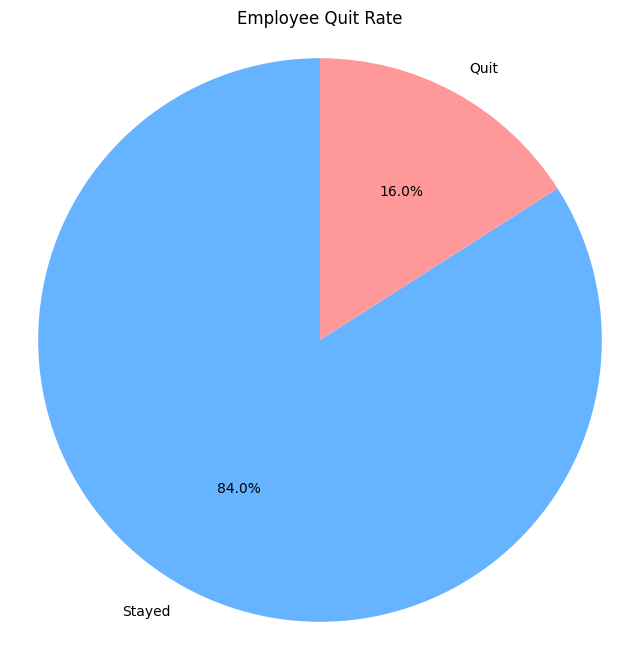

In [11]:
quit_counts = df['quit'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(quit_counts.values,
        labels=['Stayed', 'Quit'],
        colors=['#66b3ff', '#ff9999'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Employee Quit Rate')
plt.axis('equal')
plt.show()


=== satisfaction_level ===
Type: float64
Missing: 0 (0.0%)
Mean: 0.63, Std: 0.24
Min: 0.09, Max: 1.0


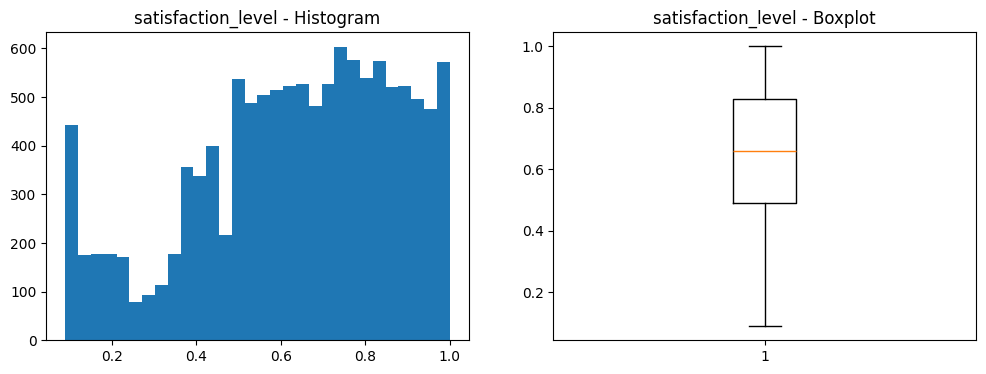


=== last_evaluation ===
Type: float64
Missing: 0 (0.0%)
Mean: 0.72, Std: 0.17
Min: 0.36, Max: 1.0


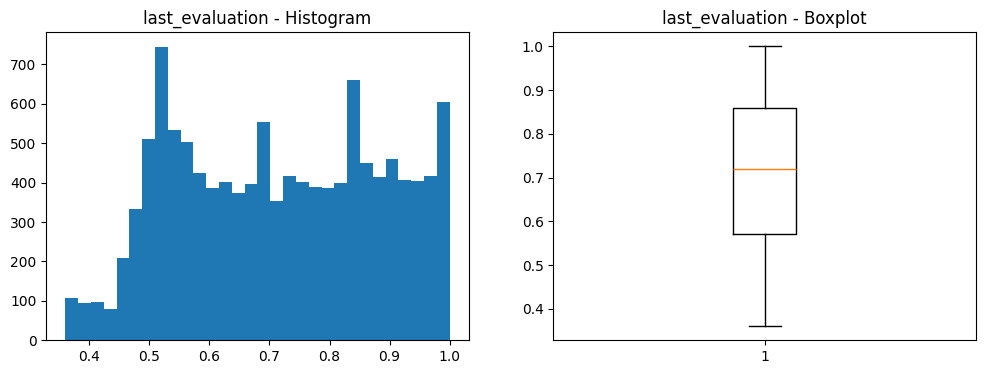


=== number_project ===
Type: int64
Missing: 0 (0.0%)
Mean: 3.79, Std: 1.15
Min: 2, Max: 7


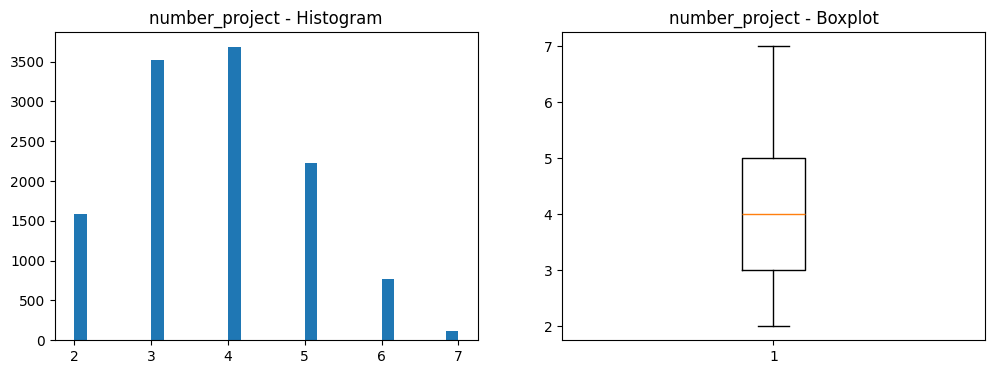


=== average_montly_hours ===
Type: int64
Missing: 0 (0.0%)
Mean: 199.66, Std: 48.03
Min: 96, Max: 300


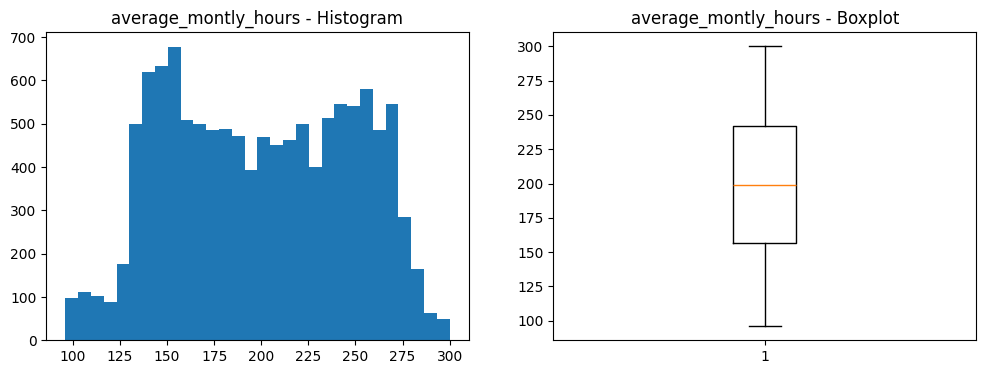


=== time_spend_company ===
Type: int64
Missing: 0 (0.0%)
Mean: 3.36, Std: 1.33
Min: 2, Max: 10


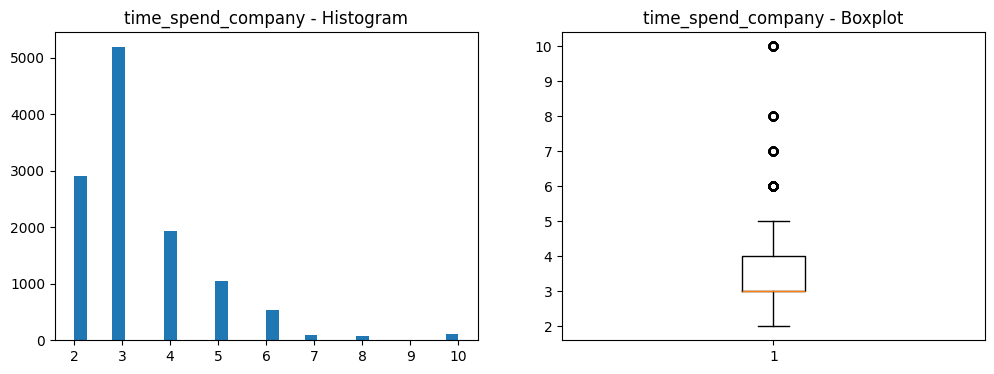


=== Work_accident ===
Type: int64
Missing: 0 (0.0%)
Mean: 0.16, Std: 0.36
Min: 0, Max: 1


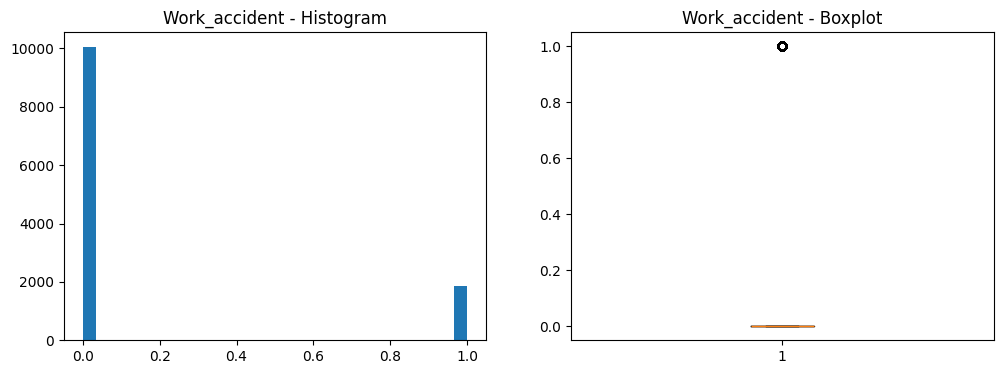


=== quit ===
Type: int64
Missing: 0 (0.0%)
Mean: 0.16, Std: 0.37
Min: 0, Max: 1


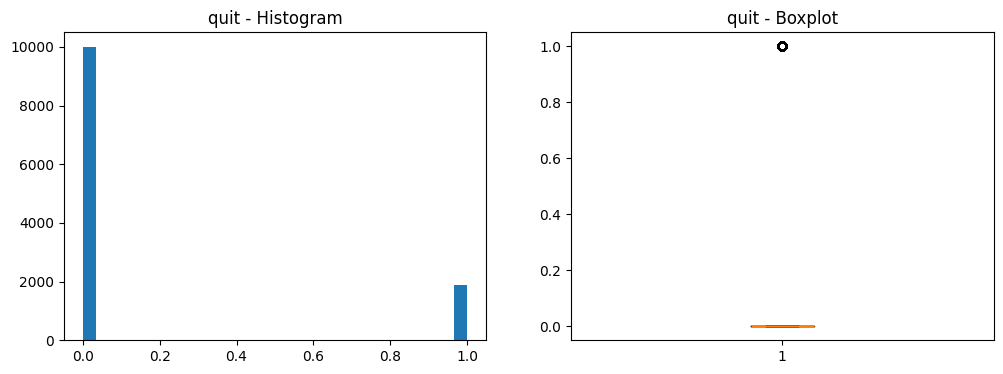


=== promotion_last_5years ===
Type: int64
Missing: 0 (0.0%)
Mean: 0.02, Std: 0.13
Min: 0, Max: 1


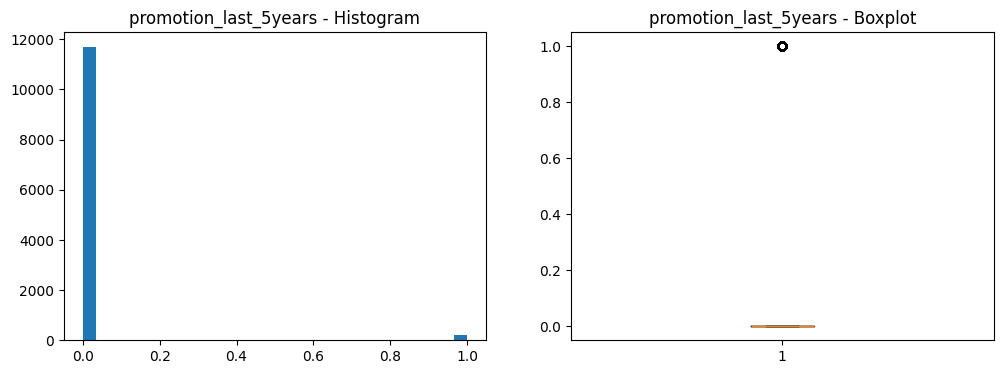


=== salary ===
Type: int64
Missing: 0 (0.0%)
Mean: 0.61, Std: 0.64
Min: 0, Max: 2


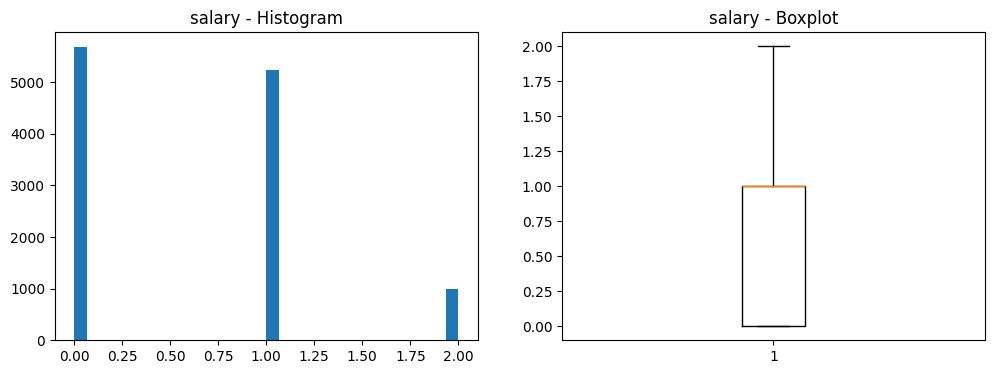


=== department_IT ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_IT
False    10934
True       965
Name: count, dtype: int64


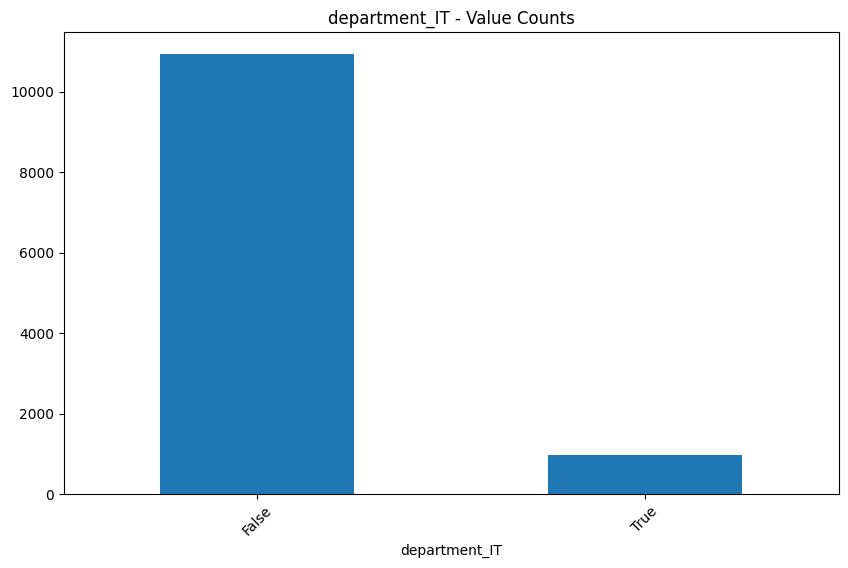


=== department_RandD ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_RandD
False    11208
True       691
Name: count, dtype: int64


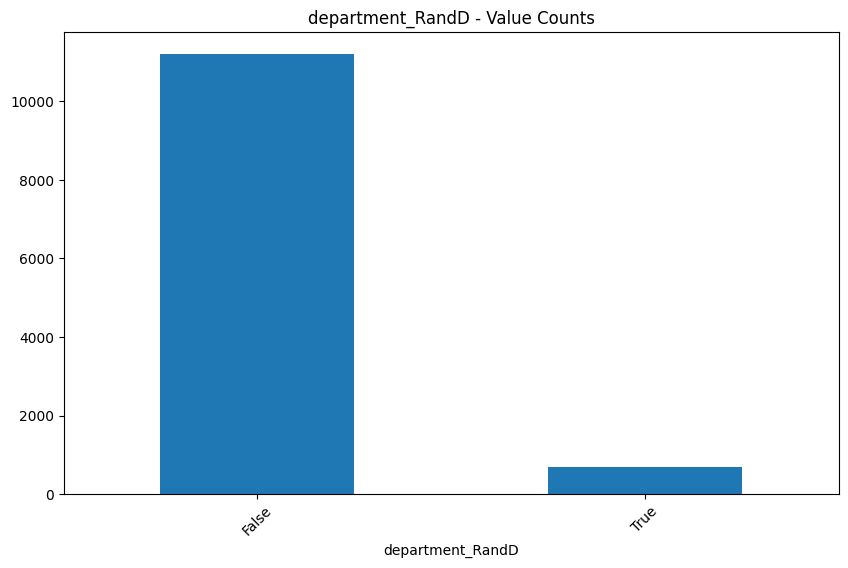


=== department_accounting ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_accounting
False    11287
True       612
Name: count, dtype: int64


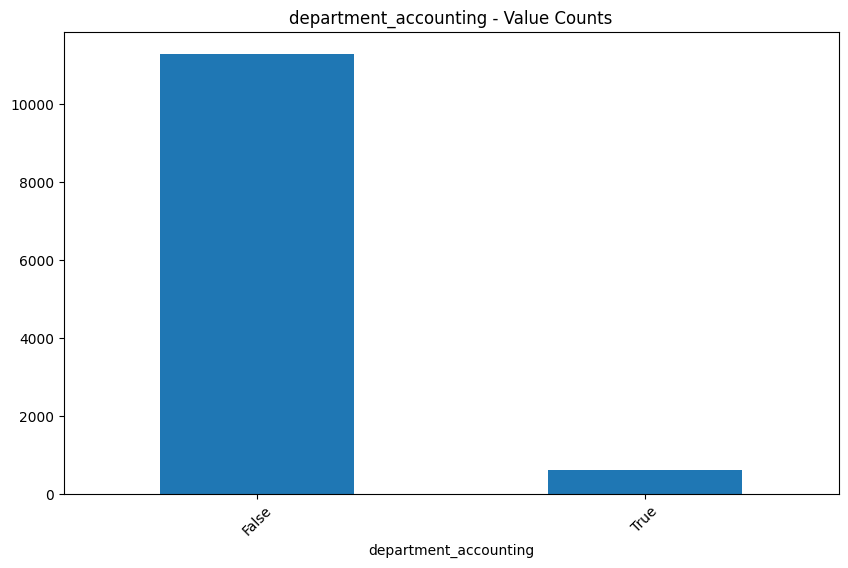


=== department_hr ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_hr
False    11303
True       596
Name: count, dtype: int64


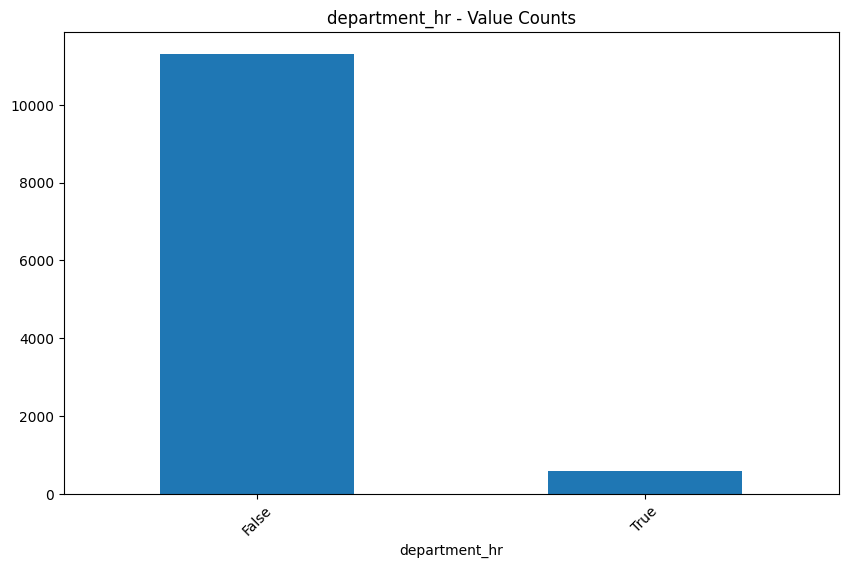


=== department_management ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_management
False    11465
True       434
Name: count, dtype: int64


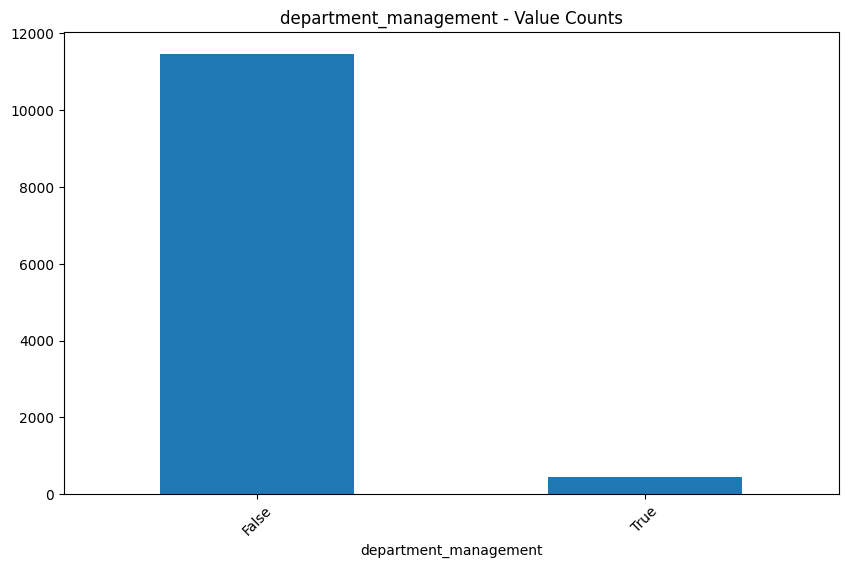


=== department_marketing ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_marketing
False    11231
True       668
Name: count, dtype: int64


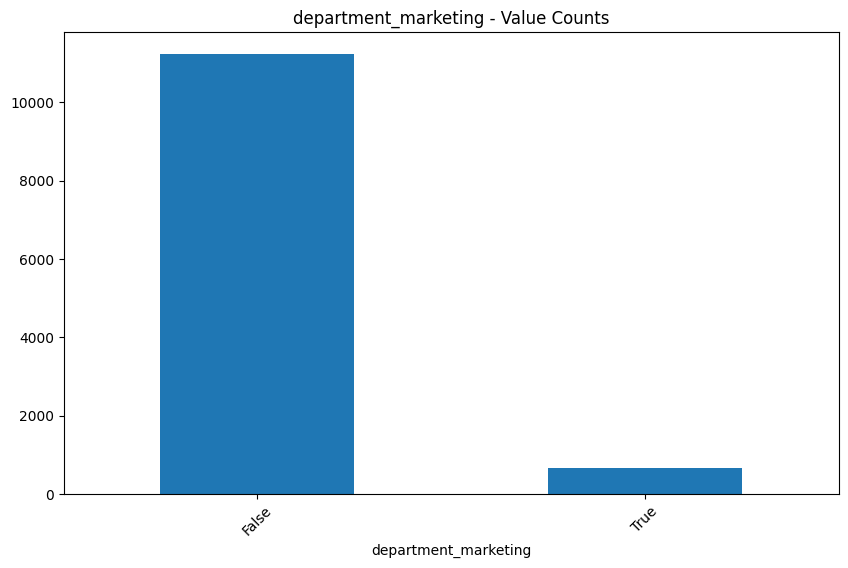


=== department_product_mng ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_product_mng
False    11219
True       680
Name: count, dtype: int64


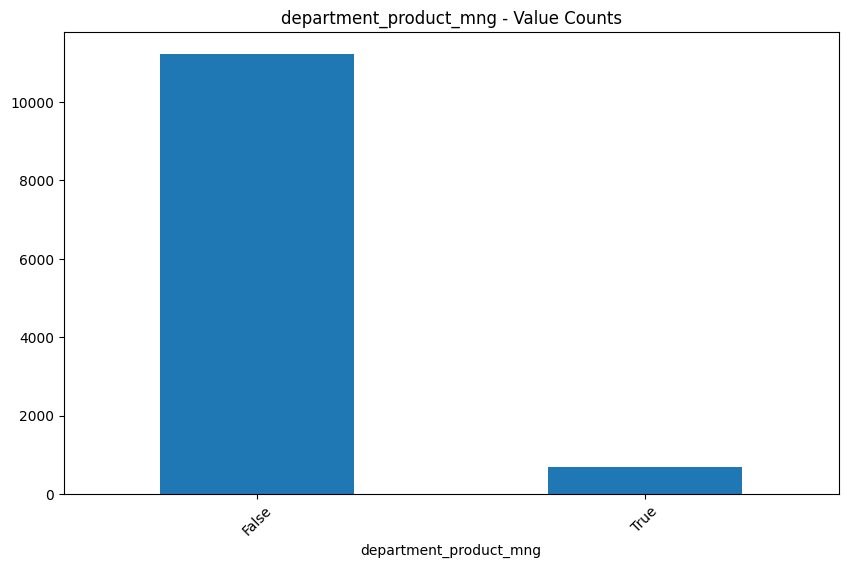


=== department_sales ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_sales
False    8678
True     3221
Name: count, dtype: int64


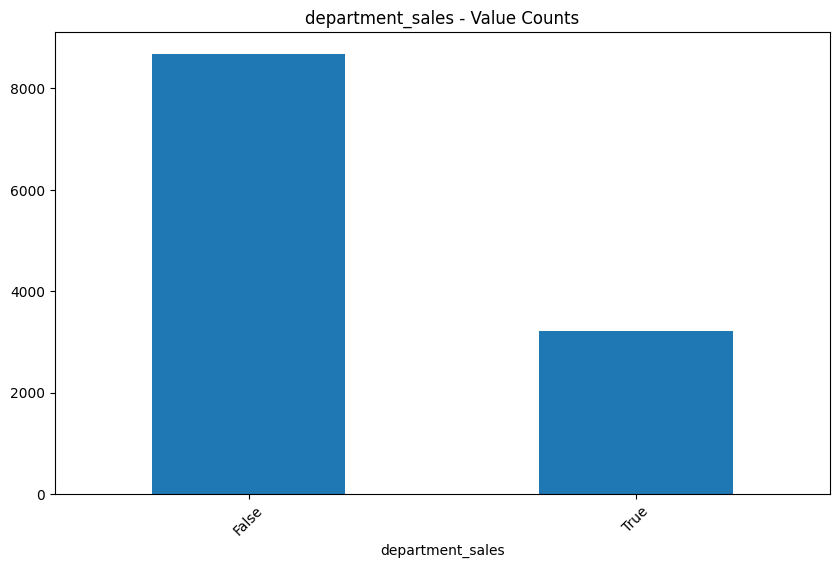


=== department_support ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_support
False    10088
True      1811
Name: count, dtype: int64


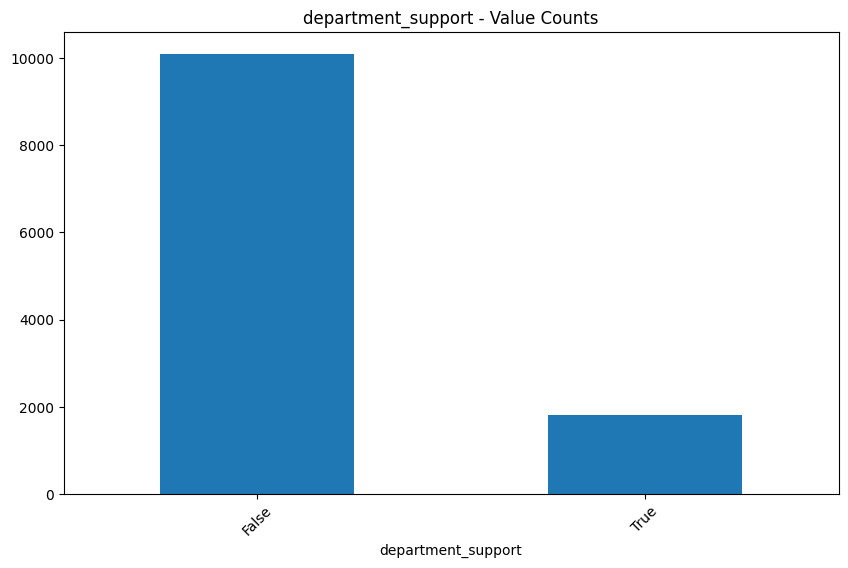


=== department_technical ===
Type: bool
Missing: 0 (0.0%)
Unique values: 2
Top 5 values:
department_technical
False    9678
True     2221
Name: count, dtype: int64


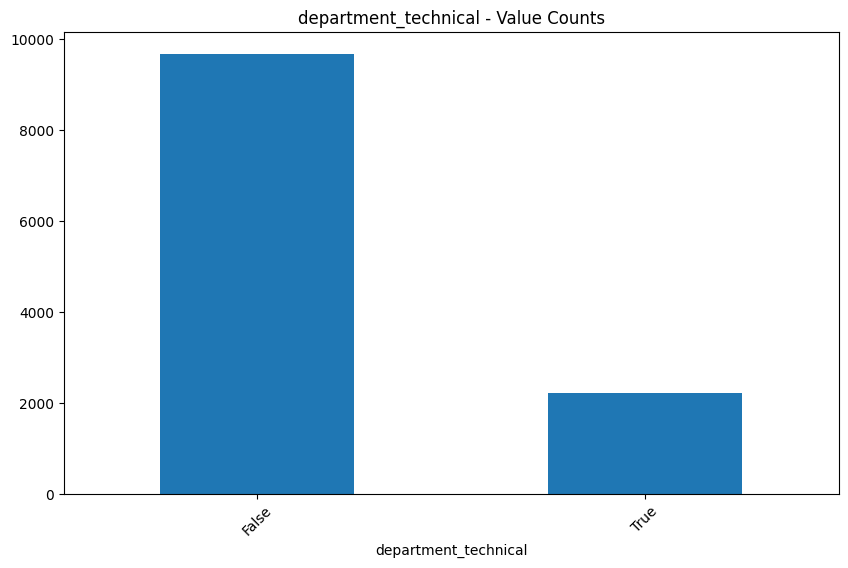


=== hours_level ===
Type: float64
Missing: 0 (0.0%)
Mean: 1.48, Std: 1.15
Min: 0.0, Max: 3.0


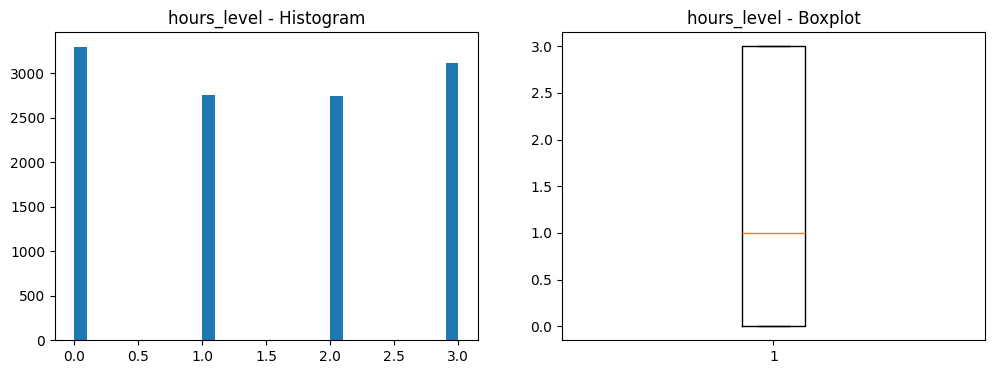

In [12]:
# Simple version - analyze all columns automatically
def analyze_all_columns_simple(df):
    """Simple analysis of all columns"""

    for column in df.columns:
        print(f"\n=== {column} ===")
        print(f"Type: {df[column].dtype}")
        print(f"Missing: {df[column].isnull().sum()} ({df[column].isnull().sum()/len(df)*100:.1f}%)")

        if df[column].dtype in ['int64', 'float64', 'int32', 'float32']:
            # Numeric column
            print(f"Mean: {df[column].mean():.2f}, Std: {df[column].std():.2f}")
            print(f"Min: {df[column].min()}, Max: {df[column].max()}")

            # Plot
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            ax1.hist(df[column].dropna(), bins=30)
            ax1.set_title(f'{column} - Histogram')
            ax2.boxplot(df[column].dropna())
            ax2.set_title(f'{column} - Boxplot')
            plt.show()

        else:
            # Categorical column
            print(f"Unique values: {df[column].nunique()}")
            print("Top 5 values:")
            print(df[column].value_counts().head())

            # Plot (if not too many categories)
            if df[column].nunique() <= 20:
                plt.figure(figsize=(10, 6))
                df[column].value_counts().plot(kind='bar')
                plt.title(f'{column} - Value Counts')
                plt.xticks(rotation=45)
                plt.show()

# Run simple analysis
analyze_all_columns_simple(df)

In [13]:
# For all boolean columns at once
df = df.replace({True: 1, False: 0})


/tmp/ipython-input-13-181543098.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


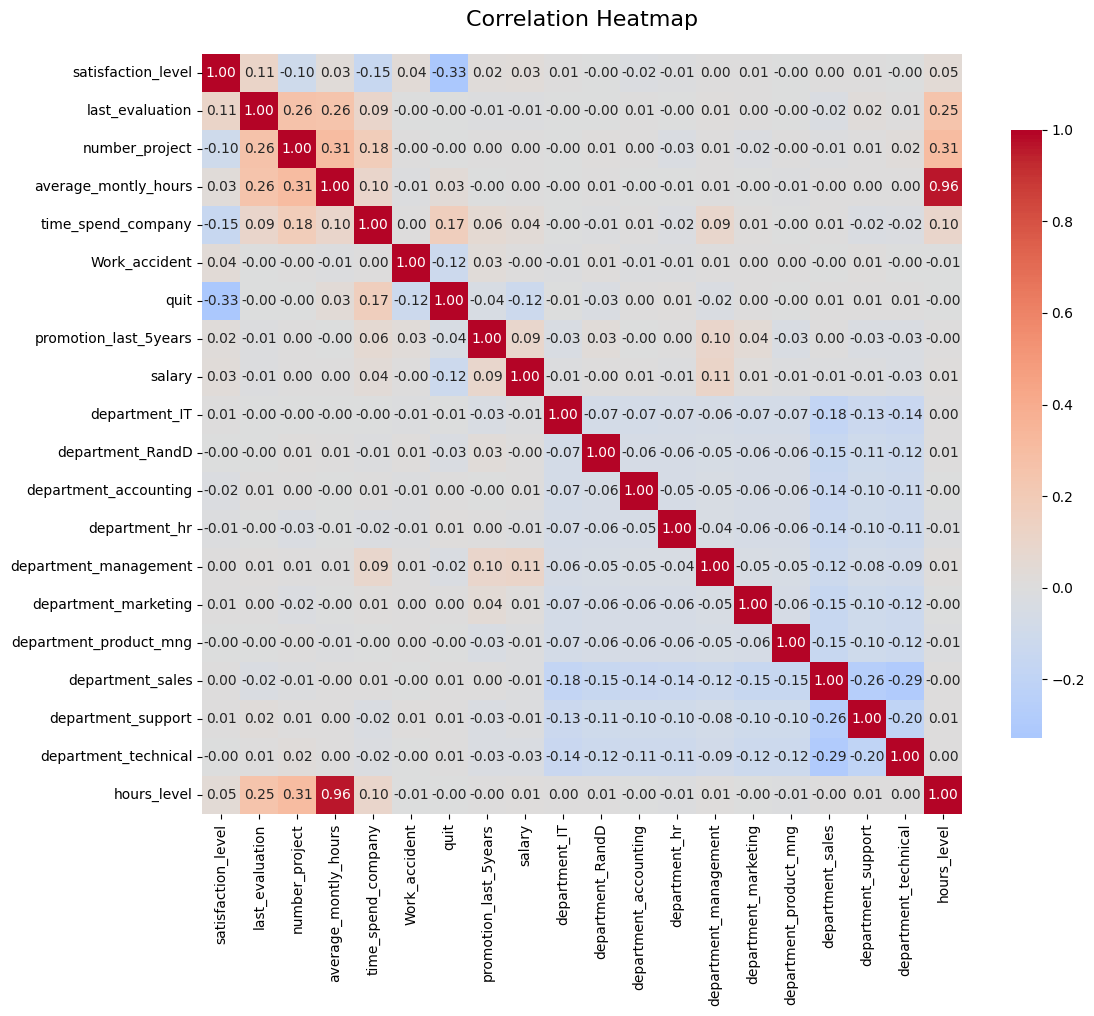

In [14]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.2f',            # Format correlation values to 2 decimal places
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [15]:
X = df.drop('quit', axis=1)
y = df['quit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
df.to_csv('df_cleaned_preprocessed.csv', index=False)